In [2]:
# Pandas for dataframe creation and for some analysis
import pandas as pd

# Numpy for mathematical computations of multidimensional arrays
import numpy as np

In [3]:
# Create pandas dataframe using read_csv method
DataFrame=pd.read_csv("housing.csv")

# Analysing shape of dataframe
print(DataFrame.shape)

# Top 5 rows of dataframe
DataFrame.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Test and train data split
TrainX=DataFrame.drop("MEDV",axis=1)
TrainY=DataFrame["MEDV"]

# Shape of train features
print(TrainX.shape)

# Shape of train labels
print(TrainY.shape)

(506, 13)
(506,)


# Pearson Correlation

#### The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.


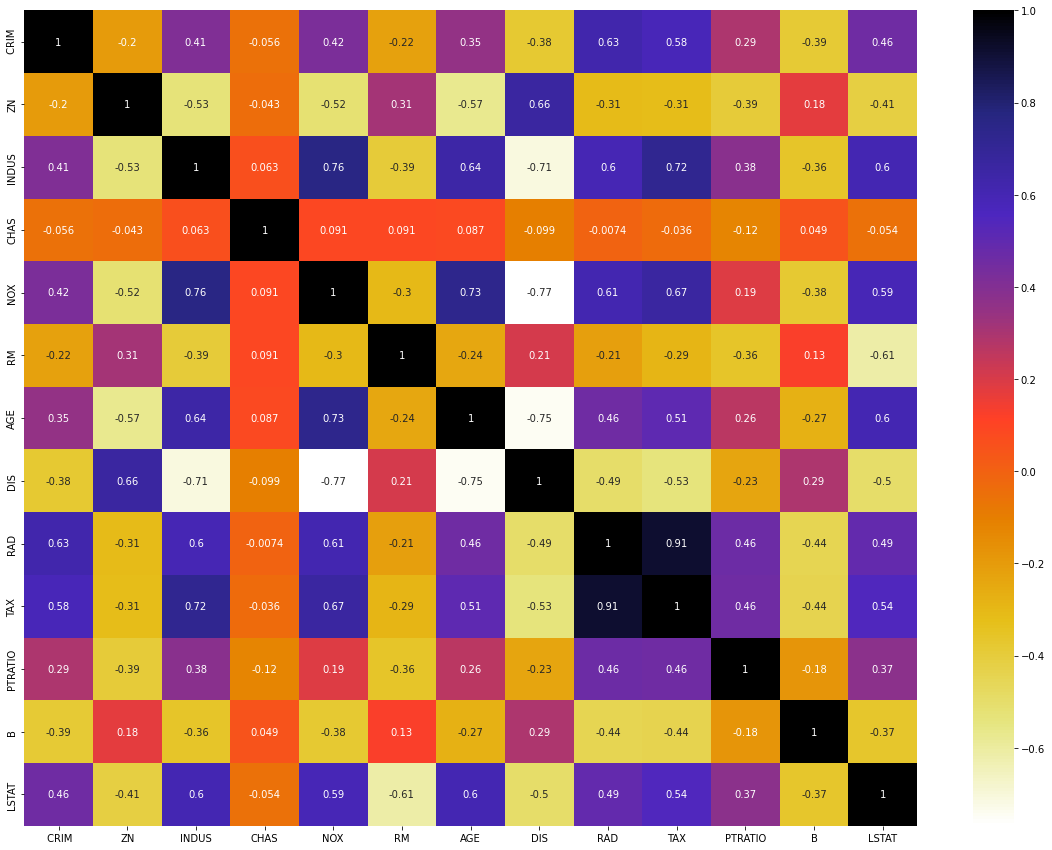

In [5]:
# Visualizing correlation using seaborn heatmap feature
import seaborn as sns

# To plot graphs import matplotlib
import matplotlib.pyplot as  plt
%matplotlib inline

# Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = TrainX.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [6]:
# From the above heat map we can say that columns with black color are highly correlated(RAD, TAX) == .91
# If we use those columns in our model prediction procees
# Then model is overfitted to dataset
# There by increases the variace on testing data


# Correlation matrix
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [7]:
# Function that returns columns that are confirmed as correlated based on threshold
def FindCorrelatedFeatures(data,Threshold):
    
    # Correlation matrix applied on data that passed
    # If we want to find correlation matrix on our own, we just need to apply
    # pearson correlation between each column in dataset
    # it reanges from -1 to 1 
    # -1 to 0 is negative correlation, means one column decreases while we increase value of other column
    # e.g: [1,2,3,4,5] [5,4,3,2,1] # they is completly negatice correlated datasets
    
    # 0 to 1 is positive correlation, means one column increases with increase in another 
    # column by some extent(it's based on correlation value)
    
    CorrelationMatrix=data.corr()
    
    
    # Initilizing correlatedfeatures as set
    # Because we don't allow duplicate correlated features
    CorrelatedFeatures=set()
    
    # For each row in dataset
    for row in range(CorrelationMatrix.shape[0]-1):
        
        # For each column in dataset
        for column in range(row+1,CorrelationMatrix.shape[1]):
            
            # If value at row and column is greater than or equal to threshold
            if CorrelationMatrix.iloc[row][column]>=Threshold:
                
                # Add features to CorrelatedFeatures
                CorrelatedFeatures.add(CorrelationMatrix.columns[row])
                CorrelatedFeatures.add(CorrelationMatrix.columns[column])
    
    # Return correlated Features
    return CorrelatedFeatures

In [8]:
# Calling FindCorrelatedFeatures funciton on trainx at 0.7 threshold value
# Again Threshold value depends on dataset that we are dealing with
# It also requires some domain knowledge

CorrelatedFeatures=FindCorrelatedFeatures(TrainX,0.7)

# printing CorrelatedFeatures
CorrelatedFeatures

{'AGE', 'INDUS', 'NOX', 'RAD', 'TAX'}

In [9]:
# If we set threshold to .8 then we find rad and tax are correlated to each other
# If we set threshold to .7 then age,indus and nox gets adeed to the list
# Choosing best threshold is needed, and it can be vary for different datasets

In [10]:
# We can remove one of the feature RAD or TAX
# But which one should we remove
# Again the best way is find the correlation between these columns and label
# The column which is having more correlation with dependent label then it should be kept in data
# And we can remove other column

df1=pd.concat([DataFrame["RAD"],TrainY],axis=1)
df2=pd.concat([DataFrame["TAX"],TrainY],axis=1)
print(df1.shape)
print(df2.shape)

(506, 2)
(506, 2)


In [63]:
# we get correlated features by applying above
# Now the thing is which one should we kept and which one should we delete ??
# For this find correlation between target feature and both indepedent columns
print(df1.corr())
print(df2.corr())

           RAD      MEDV
RAD   1.000000 -0.381626
MEDV -0.381626  1.000000
           TAX      MEDV
TAX   1.000000 -0.468536
MEDV -0.468536  1.000000


In [11]:
# since RAD column has more correlation with target feature, we can remove TAX from dataset
TrainX.drop(["TAX"],inplace=True,axis=1)
TrainX.shape

(506, 12)